In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [2]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
______________________________________________

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (64, 64),
                                                 batch_size = 8,
                                                 class_mode = 'binary')
val_set = val_datagen.flow_from_directory('Datasets/val',
                                            target_size = (64, 64),
                                            batch_size = 8,
                                            class_mode = 'binary')



Found 142 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [4]:

model.fit(training_set,
          steps_per_epoch = 10,
          epochs = 50,
          validation_data = val_set,
          validation_steps = 2)




Epoch 1/50
10/10 [==============================] - 13s 1s/step - loss: 2.7212 - accuracy: 0.4744 - val_loss: 0.9567 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 8s 769ms/step - loss: 0.8596 - accuracy: 0.4625 - val_loss: 0.5674 - val_accuracy: 0.6875
Epoch 3/50
10/10 [==============================] - 15s 2s/step - loss: 0.6727 - accuracy: 0.6026 - val_loss: 0.6713 - val_accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 40s 4s/step - loss: 0.6392 - accuracy: 0.7000 - val_loss: 0.6086 - val_accuracy: 0.5625
Epoch 5/50
10/10 [==============================] - 25s 3s/step - loss: 0.6177 - accuracy: 0.6923 - val_loss: 0.6591 - val_accuracy: 0.4375
Epoch 6/50
10/10 [==============================] - 5s 509ms/step - loss: 0.5989 - accuracy: 0.7436 - val_loss: 0.5910 - val_accuracy: 0.6875
Epoch 7/50
10/10 [==============================] - 7s 417ms/step - loss: 0.5804 - accuracy: 0.6795 - val_loss: 0.5107 - val_accuracy: 0.8125
Epoch 8/50
10/

In [5]:

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [9]:
from keras.models import model_from_json
import numpy as np
from keras.preprocessing import image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image


json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

model = model_from_json(loaded_model_json)
model.load_weights("model.h5")
print("Loaded model from disk")



# Assuming 'model' is already defined somewhere in your code

def classify(img_file):
    img_name = img_file
    test_image = image.load_img(img_name, target_size=(64, 64))

    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)

    if result[0][0] == 1:
        prediction = 'fox'
    else:
        prediction = 'cat'
    print(prediction, img_name)



Loaded model from disk


In [10]:
# Specify the path to the directory containing images
path = 'F:\\Jupyter_Notebook\\AI_INTERNSHIP\\day12\\Code\\Code\\Datasets\\test'

# List to store file paths
files = []

# r=root, d=directories, f=files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpeg' in file:
            files.append(os.path.join(r, file))

# Iterate through the list of image files
for f in files:
    # Call the classify function for each image file
    classify(f)


1/1 [==============================] - 0s 56ms/step
cat F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_188.jpeg
1/1 [==============================] - 0s 21ms/step
cat F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_1b5.jpeg
1/1 [==============================] - 0s 22ms/step
cat F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_29c.jpeg
1/1 [==============================] - 0s 16ms/step
cat F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_343.jpeg
1/1 [==============================] - 0s 19ms/step
cat F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_354.jpeg
1/1 [==============================] - 0s 24ms/step
cat F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_367.jpeg
1/1 [==============================] - 0s 21ms/step
cat F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_388.jpeg
1/1 [==============================] - 0s

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'model' is already defined somewhere in your code

# Lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Specify the path to the directory containing test images
test_path = 'F:\\Jupyter_Notebook\\AI_INTERNSHIP\\day12\\Code\\Code\\Datasets\\test'

# Iterate through subfolders
for class_folder in os.listdir(test_path):
    class_path = os.path.join(test_path, class_folder)
    
    # r=root, d=directories, f=files
    for r, d, f in os.walk(class_path):
        for file in f:
            if '.jpeg' in file:
                # Get the true class from the subfolder name
                true_class = class_folder
                true_labels.append(true_class)

                # Call the classify function for each image file
                img_path = os.path.join(r, file)
                test_image = image.load_img(img_path, target_size=(64, 64))
                test_image = image.img_to_array(test_image)
                test_image = np.expand_dims(test_image, axis=0)
                result = model.predict(test_image)

                # Convert the predicted probability to a class label
                predicted_class = 'fox' if result[0][0] == 1 else 'cat'
                predicted_labels.append(predicted_class)

                # Print the prediction
                print(f"True class: {true_class}, Predicted class: {predicted_class}, Image path: {img_path}")

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))



1/1 [==============================] - 0s 16ms/step
True class: cat, Predicted class: cat, Image path: F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_188.jpeg
1/1 [==============================] - 0s 16ms/step
True class: cat, Predicted class: cat, Image path: F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_1b5.jpeg
1/1 [==============================] - 0s 21ms/step
True class: cat, Predicted class: cat, Image path: F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_29c.jpeg
1/1 [==============================] - 0s 8ms/step
True class: cat, Predicted class: cat, Image path: F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_343.jpeg
1/1 [==============================] - 0s 20ms/step
True class: cat, Predicted class: cat, Image path: F:\Jupyter_Notebook\AI_INTERNSHIP\day12\Code\Code\Datasets\test\cat\cat_354.jpeg
1/1 [==============================] - 0s 21ms/step
True class: cat, Predicted cl

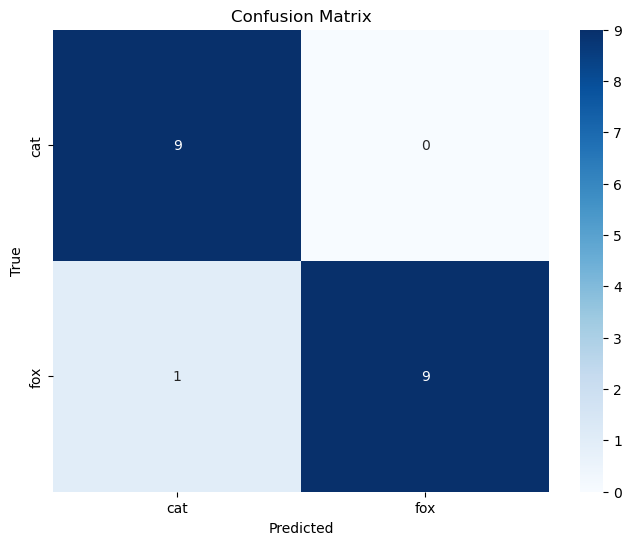

Classification Report:
              precision    recall  f1-score   support

         cat       0.90      1.00      0.95         9
         fox       1.00      0.90      0.95        10

    accuracy                           0.95        19
   macro avg       0.95      0.95      0.95        19
weighted avg       0.95      0.95      0.95        19



In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ... (previous code)

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['cat', 'fox'], yticklabels=['cat', 'fox'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))
